In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd 
from sklearn.impute import SimpleImputer

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
os.listdir()

['.config', 'drive', 'sample_data']

In [20]:
%cd drive/My Drive
%cd UTA/5334/Titanic

/content/drive/My Drive
/content/drive/My Drive/UTA/5334/Titanic


In [24]:
os.listdir()

['titanic.ipynb',
 'titanic.zip',
 'oldsubmission.csv',
 'submission_v1.csv',
 'submission.csv',
 'titanic_kaggle.ipynb',
 '.DS_Store',
 '.ipynb_checkpoints',
 'titanic']

In [29]:
os.walk('/titanic')

<generator object walk at 0x7f159bf49ed0>

In [30]:
os.listdir()

['titanic.ipynb',
 'titanic.zip',
 'oldsubmission.csv',
 'submission_v1.csv',
 'submission.csv',
 'titanic_kaggle.ipynb',
 '.DS_Store',
 '.ipynb_checkpoints',
 'titanic']

In [34]:
import os
for dirname, _, filenames in os.walk('titanic'):
    for filename in filenames:
      print("filepath",os.path.join(dirname, filename))

filepath titanic/train.csv
filepath titanic/test.csv
filepath titanic/gender_submission.csv


(Contribution) : Data Preprocessing step 
Checking for NAN and Null value in training data set.

Generated correlation heat map to find the features having positive correlations.

Creating new data frame from existing and removing the NAN,NULL value with mean value for the column

In [36]:
training_data = pd.read_csv("titanic/train.csv")
training_data.head()
print("Is NULL")
print(training_data.isnull().any())
print("Is NA")
print(training_data.isna().any())

Is NULL
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
Is NA
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


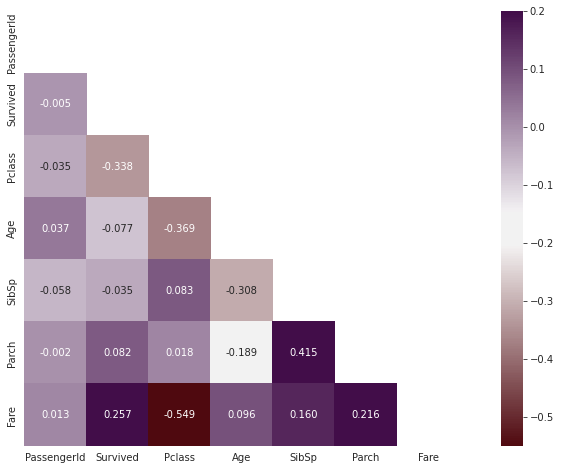

In [37]:
mask = np.zeros_like(training_data.corr())
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(730, 300, sep=20, as_cmap=True, s=85, l=15, n=20)
with sns.axes_style("white"):
    fig, ax = plt.subplots(1,1, figsize=(15,8))
    ax = sns.heatmap(training_data.corr(), mask=mask, vmax=0.2, square=True, annot=True, fmt=".3f", cmap=cmap)

In [81]:
new_training_data = training_data.copy()
fare_mean = new_training_data["Fare"].mean()
new_training_data.Fare.fillna(new_training_data.Fare.dropna().mean())
print(training_data.isna().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [82]:
test_data = pd.read_csv("titanic/test.csv")
new_test_data = test_data.copy()
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(new_test_data[['Fare']])
new_test_data['Fare'] = imputer.transform(new_test_data[['Fare']])
print(new_test_data.isna().any())

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool


In [42]:
women = training_data.loc[training_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [43]:
men = training_data.loc[training_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


Score: 0.76555

In [44]:
from sklearn.ensemble import RandomForestClassifier

y = training_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(training_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=1, max_depth=1, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Score: 0.66746

In [85]:
from sklearn.ensemble import RandomForestClassifier

y = training_data["Survived"]

training_data['Fare'] = training_data['Fare'].apply(lambda x: np.round(x, decimals=0)).astype(np.int32)
print(test_data.isna().any())
new_test_data['Fare'] = new_test_data['Fare'].apply(lambda x: np.round(x, decimals=0)).astype(np.int32)
# training_data['Fare'] = training_data['Fare'].astype(np.float32)
features = ["Pclass", "Sex", "SibSp", "Parch","Fare"]

X_updated = pd.get_dummies(training_data[features])
X_test_updated = pd.get_dummies(new_test_data[features])

model = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=1)
model.fit(X_updated, y)
predictions = model.predict(X_test_updated)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
Your submission was successfully saved!


Score: 0.77511

In [86]:
from sklearn.ensemble import RandomForestClassifier

y = training_data["Survived"]

# training_data['Fare'] = training_data['Fare'].apply(lambda x: np.round(x, decimals=0)).astype(np.int32)
# new_test_data['Fare'] = new_test_data['Fare'].apply(lambda x: np.round(x, decimals=0)).astype(np.int32)
# # training_data['Fare'] = training_data['Fare'].astype(np.float32)
features = ["Pclass", "Sex", "SibSp", "Parch","Fare"]

X_updated = pd.get_dummies(training_data[features])
X_test_updated = pd.get_dummies(new_test_data[features])

model = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=1)
model.fit(X_updated, y)
predictions = model.predict(X_test_updated)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Score: 0.77272

In [87]:
from sklearn.ensemble import RandomForestClassifier

y = training_data["Survived"]

# training_data['Fare'] = training_data['Fare'].apply(lambda x: np.round(x, decimals=0)).astype(np.int32)
# new_test_data['Fare'] = new_test_data['Fare'].apply(lambda x: np.round(x, decimals=0)).astype(np.int32)
# # training_data['Fare'] = training_data['Fare'].astype(np.float32)
features = ["Pclass", "Sex", "SibSp", "Parch","Fare"]

X_updated = pd.get_dummies(training_data[features])
X_test_updated = pd.get_dummies(new_test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=16, random_state=2)
model.fit(X_updated, y)
predictions = model.predict(X_test_updated)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
